## Process HDA images to be aligned using 5 landmarks and resized to 112x112. Save these in a new path. 

In [89]:
#!pip install scikit-image

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.0/225.0 kB 28.8 MB/s eta 0:00:00


In [2]:
# Load packages

from retinaface import RetinaFace
import cv2
import os
import numpy as np
import sys
sys.path.append('../../MagFace-main/utils/')
import face_align
import matplotlib.pyplot as plt

In [3]:
data_root_folder = '../../data/'

os.path.join(data_root_folder, 'fine_tune_train_list_TEST.list')

'../../data/fine_tune_train_list_TEST.list'

In [4]:
os.path.dirname('../../data/fine_tune_train_list_TEST.list')

'../../data'

In [6]:
path = '../../data/fine_tune_train_list_TEST.list'
directory = os.path.abspath(os.path.dirname(path))
os.access(directory, os.W_OK)

True

In [2]:
def extract_landmarks(image_path):
    landmark_values = RetinaFace.detect_faces(image_path)["face_1"]["landmarks"].values()
    return np.array([sublist for sublist in landmark_values])


In [6]:
# With help from franck hda synth loader
main_dataset_folder = '../../data/raw/HDA'
output_folder = "../../data/raw_full/HDA_aligned_resized"
imgs_output_folder = output_folder + '/images'
rest_path = '/probes/images'
image_size=112

os.makedirs(output_folder, exist_ok=True)
os.makedirs(imgs_output_folder, exist_ok=True)

with open(os.path.join(output_folder, 'fine_tune_train_list.txt'), 'w') as train_list_file:
    for age_group in range(1):
        id_counter = 0
        # Create output directory for the current age group   
        age_group_folder = os.path.join(main_dataset_folder, f'age_group_{age_group}' + rest_path)
        all_images = sorted([image for image in os.listdir(age_group_folder) if image.endswith('.png')]) #Jpg images are bad image quality
        num_images = len(all_images)    
        print("Number of images in original directory age_group_{}:".format(age_group), num_images)
                     
        # Iterate over each image path
        for img in all_images:
            try: 
                input_image_path = os.path.join(age_group_folder, img)
                cv_image = cv2.imread(input_image_path)
                # Use MagFace function for alignment (utils.face_align.py)
                landmarks_np = extract_landmarks(input_image_path)
                aligned_resized_image = face_align.norm_crop(cv_image, landmarks_np, image_size, mode='arcface') 
                output_image_path = os.path.join(imgs_output_folder, os.path.basename(img))
                cv2.imwrite(output_image_path, aligned_resized_image)
                train_list_file.write(f'{input_image_path} 0 {img.split("_")[0]}\n') #corresponding to id. list format required by magface
            except:
                print("Error processing image, possibly due to low image quality:", img)
            pass
            id_counter += 1

        print("\n*** {id_counter} images were preprocessed and saved in new directory age_group_{ag} :) ***".format(id_counter=id_counter, ag=age_group))
                    
                


Number of images in original directory age_group_0: 32

*** 32 images were preprocessed and saved in new directory age_group_0 :) ***


In [5]:
# Check number of ids in list 
list_folder = "../../data/data_full/HDA_aligned_resized/fine_tune_train_list.list"
# Children feature vectorsx
with open(list_folder, 'r') as f:
    lines = f.readlines()
imids = []

for line in lines:
    parts = line.strip().split(' ')
    imids.append(parts[-1])


In [6]:
if 1:
    print("true")
elif 0:
    print("False")

true


In [7]:
set(imids)

{'0', '1'}

In [8]:
def change_id_incremental(file_path):
    "file_path: your_file_path_here.list"
    # Read the contents of the .list file
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Extract IDs and create a mapping
    id_mapping = {}
    for line in lines:
        parts = line.strip().split()
        image_path = parts[0]
        id_value = int(parts[-1])
        if id_value not in id_mapping:
            id_mapping[id_value] = len(id_mapping)
        parts[-1] = str(id_mapping[id_value])
        lines[lines.index(line)] = ' '.join(parts) + '\n'

    # Write the updated contents back to the .list file
    with open(file_path, "w") as file:
        file.writelines(lines)

In [11]:
change_id_incremental("../../data/data_full/HDA_aligned_resized/fine_tune_train_list.list")

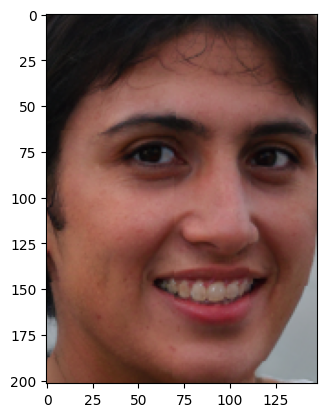

In [19]:
import matplotlib.pyplot as plt
faces = RetinaFace.extract_faces(img_path = "../../data/raw_test/HDA/accepted/probes/images/19122_21_F_indian_0.png", align_first = True)
plt.imshow(faces[0])
plt.show()

Image size: (112, 112)


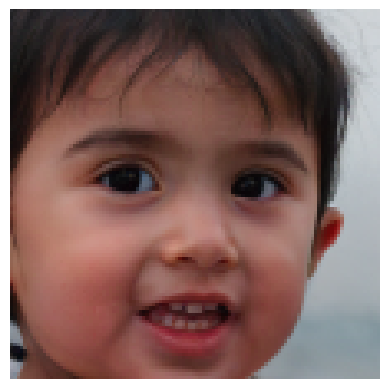

In [9]:

from PIL import Image
import matplotlib.pyplot as plt

# Read the image using Pillow
image_path = "../../data/data_full/HDA_aligned_resized/images/19122_3_F_indian_0.png"
image_pil = Image.open(image_path)
# Get the size of the image
image_size = image_pil.size
print("Image size:", image_size)
# Display the image
plt.imshow(image_pil)
plt.axis('off')  # Turn off axis
plt.show()

### SHOW cropping - in inference

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
def crop_face_cv2(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    
    # Convert the image to grayscale
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load the pre-trained face detector
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    # Detect faces in the image
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    try:
        if len(faces) > 0:
            # Assuming only one face is present, extract the first face
            (x, y, w, h) = faces[0]
            
            # Crop the face from the image
            face_image = image[y:y+h, x:x+w]
            
            return face_image
    except:
        print("No face found in the image.")
        pass


In [23]:
im = crop_face_cv2("/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/data/data_full/RFW/data/Caucasian/m.0c3bq1/m.0c3bq1_0004.jpg")

Image size: (230, 230, 3)


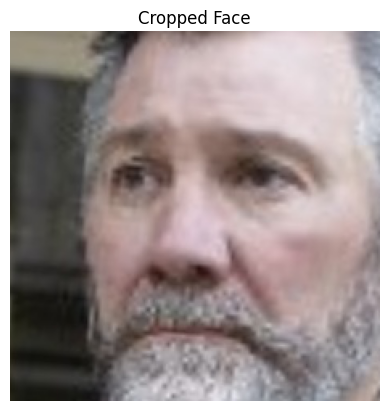

In [28]:
if im is not None:
    # Display the cropped face using Matplotlib
    image_size = im.shape
    print("Image size:", image_size)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.title('Cropped Face')
    plt.axis('off')  # Hide axis
    plt.show()

In [25]:
image = cv2.imread("/Users/gabriellakierulff/Desktop/HCAI/speciale/Master_Thesis/data/data_full/RFW/data/Caucasian/m.0c3bq1/m.0c3bq1_0004.jpg")

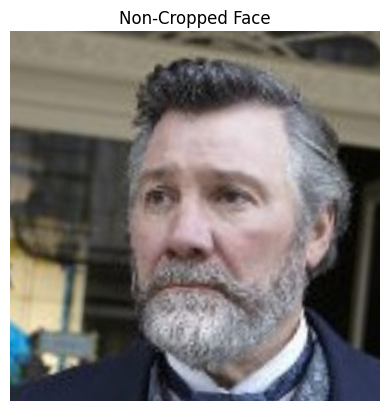

In [26]:
if image is not None:
    # Display the cropped face using Matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Non-Cropped Face')
    plt.axis('off')  # Hide axis
    plt.show()